#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
df_flat = df.copy()
customer_expanded = pd.json_normalize(df_flat['customer'])
phone_expanded = pd.json_normalize(df_flat['phone'])
internet_expanded = pd.json_normalize(df_flat['internet'])
account_expanded = pd.json_normalize(df_flat['account'])

In [ ]:
df_transformed = pd.concat(
    [df_flat[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded],
    axis=1
)

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_transformed.isnull().sum().sort_values(ascending=False)


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
df_transformed.duplicated().sum()


np.int64(0)

In [ ]:
df_transformed.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [ ]:
df_transformed['Charges.Total'] = pd.to_numeric(df_transformed['Charges.Total'], errors='coerce')
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_transformed['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
df_transformed['Churn'] = df_transformed['Churn'].str.strip().str.lower()
df_transformed['Churn'].value_counts()




,count
Churn,
no,5174
yes,1869
,224


In [ ]:
import numpy as np
df_transformed['Churn'] = df_transformed['Churn'].replace('', np.nan)

In [ ]:
df_transformed['Churn'].isna().sum()


np.int64(224)

In [ ]:
df_transformed['Churn'].value_counts()

,count
Churn,
no,5174
yes,1869


In [ ]:
df_transformed = df_transformed.dropna(subset=['Churn'])

In [ ]:
df_transformed['Churn'] = df_transformed['Churn'].str.strip().str.lower()
df_transformed['Churn'].value_counts()


/tmp/ipython-input-130-2383126432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformed['Churn'] = df_transformed['Churn'].str.strip().str.lower()


,count
Churn,
no,5174
yes,1869


In [ ]:
df_transformed['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
df_transformed['Contract'] = df_transformed['Contract'].str.lower().str.replace(' ', '-', regex=False)
df_transformed['Contract'].value_counts()



,count
Contract,
month-to-month,3875
two-year,1695
one-year,1473


In [ ]:
df_transformed['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [ ]:
df_transformed['PaymentMethod'] = df_transformed['PaymentMethod'].str.lower().str.replace(' ', '-', regex=False)
df_transformed['PaymentMethod'].value_counts()

,count
PaymentMethod,
electronic-check,2365
mailed-check,1612
bank-transfer-(automatic),1544
credit-card-(automatic),1522


In [ ]:
df_transformed['Charges.Total'].value_counts()

,count
Charges.Total,
20.20,11
19.75,9
19.90,8
19.65,8
20.05,8
...,...
2058.50,1
829.55,1
625.65,1


In [ ]:
df_transformed.columns = df_transformed.columns.str.lower()
df_transformed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 
 17  

In [ ]:
df_transformed['charges.monthly'].dtype



dtype('float64')

In [ ]:
df_transformed['charges.monthly'].isnull().sum()

np.int64(0)

In [ ]:
df_transformed['cuentas_diarias'] = df_transformed['charges.monthly'] / 30


In [ ]:
df_transformed[['charges.monthly', 'cuentas_diarias']].head()


,charges.monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [ ]:
df_transformed['churn'].value_counts()

,count
churn,
no,5174
yes,1869


In [ ]:
df_transformed['churn'] = df_transformed['churn'].str.strip().str.lower()
df_transformed['churn'] = df_transformed['churn'].map({'yes': 1, 'no': 0})
df_transformed['churn'].value_counts()

,count
churn,
0,5174
1,1869


#📊 Carga y análisis

In [ ]:
df_transformed.describe()


,churn,seniorcitizen,tenure,charges.monthly,charges.total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.441561,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [ ]:
df_transformed['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.73463
1,0.26537


In [150]:
df_transformed.groupby('churn')['charges.monthly'].mean()


,charges.monthly
churn,
0,61.265124
1,74.441332


In [151]:
df_transformed.groupby('churn')['tenure'].median()

,tenure
churn,
0,38.0
1,10.0


In [152]:
df_transformed.groupby('churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


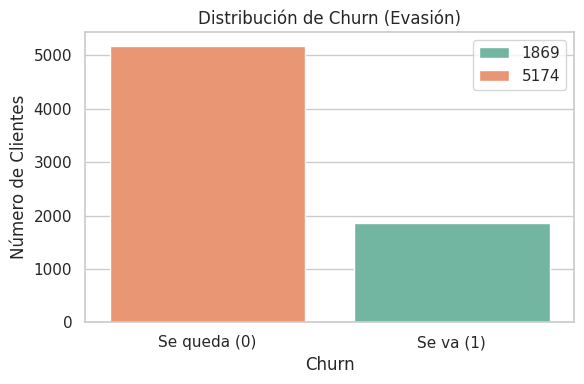

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


churn_counts = df_transformed['churn'].value_counts().sort_index()


plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values,hue=churn_counts.values, palette='Set2')


plt.xticks([0, 1], ['Se queda (0)', 'Se va (1)'])
plt.title('Distribución de Churn (Evasión)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()


## Evasion por genero

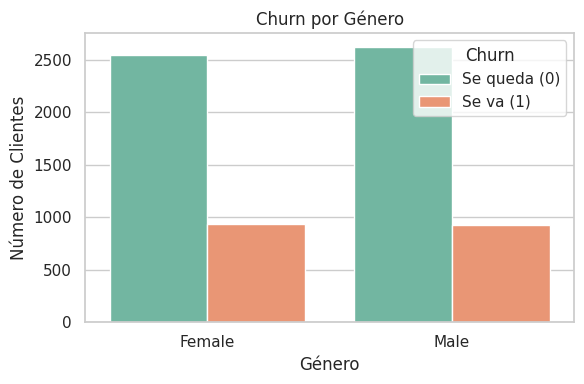

In [156]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_transformed, x='gender', hue='churn', palette='Set2')
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Se queda (0)', 'Se va (1)'])
plt.tight_layout()
plt.show()


## Evasion por tipo de contrato

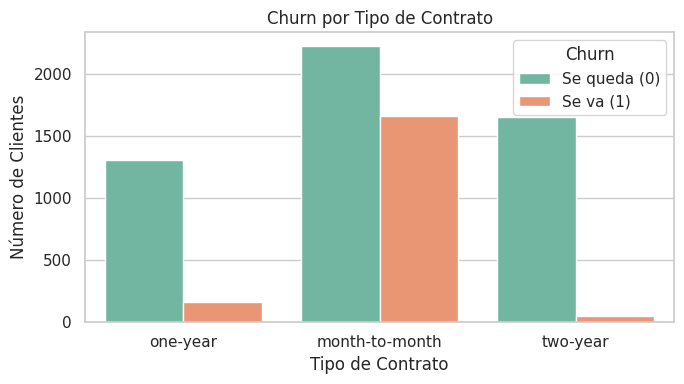

In [157]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_transformed, x='contract', hue='churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Se queda (0)', 'Se va (1)'])
plt.tight_layout()
plt.show()


## Evasion por metodo de pago

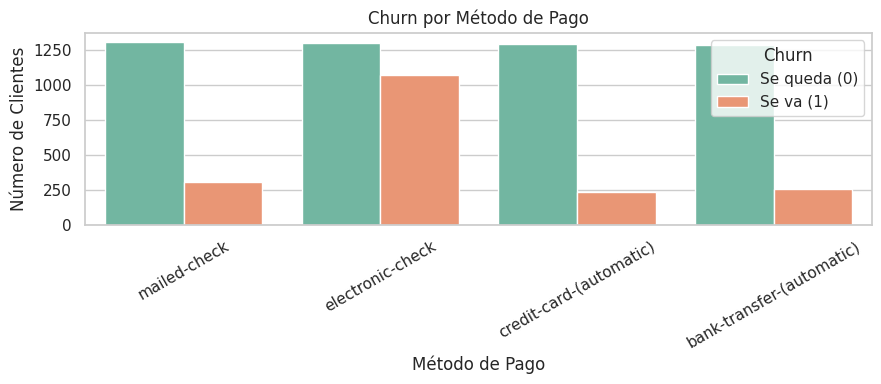

In [177]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df_transformed, x='paymentmethod', hue='churn', palette='Set2')
plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=30)
plt.legend(title='Churn', labels=['Se queda (0)', 'Se va (1)'])
plt.tight_layout()
plt.savefig('/content/metodo_pago.png', transparent=False,dpi=300, bbox_inches='tight')
plt.show()


## Cuanto duran los clientes? (mediana con boxplot)


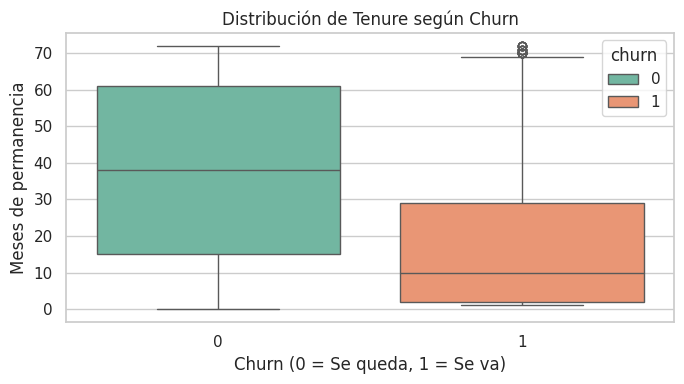

In [176]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_transformed, x='churn', hue='churn', y='tenure', palette='Set2')
plt.title('Distribución de Tenure según Churn')
plt.xlabel('Churn (0 = Se queda, 1 = Se va)')
plt.ylabel('Meses de permanencia')
plt.tight_layout()
plt.savefig('/content/tenure_churn.png', transparent=False,dpi=300, bbox_inches='tight')
plt.show()


## Distribución de Cargo Mensual según Churn

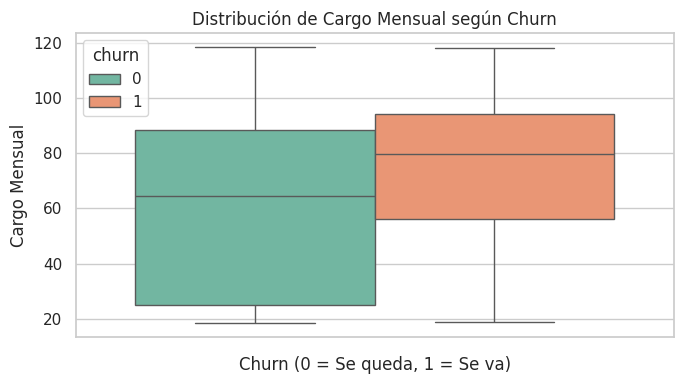

In [178]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_transformed, hue='churn', y='charges.monthly', palette='Set2')
plt.title('Distribución de Cargo Mensual según Churn')
plt.xlabel('Churn (0 = Se queda, 1 = Se va)')
plt.ylabel('Cargo Mensual')
plt.tight_layout()
plt.savefig('/content/cargo_mensual.png', transparent=False,dpi=300, bbox_inches='tight')
plt.show()


In [174]:
df_transformed.groupby('churn')[['tenure', 'charges.monthly', 'charges.total']].mean()


,tenure,charges.monthly,charges.total
churn,,,
0,37.569965,61.265124,2555.344141
1,17.979133,74.441332,1531.796094


#📄Informe final

##Introducción


El objetivo de este análisis fue entender el comportamiento de los clientes de la empresa de telecomunicaciones TelecomX_Latam, enfocándonos en la evasión de clientes (churn). Se buscaba descubrir patrones que ayuden a predecir por qué algunos clientes se van y qué características tienen en común, para así tomar decisiones que ayuden a reducir la tasa de cancelación.

## Limpieza y Tratamiento de Datos

Se comenzó importando los datos y revisando si existían valores nulos o inconsistentes. Algunos pasos importantes fueron:


*   Cambiar los nombres de las columnas a minúsculas y reemplazar espacios por
guiones para facilitar el análisis.
*   Convertir los valores de “Yes/No” en binarios (1/0), por ejemplo en la columna churn.
*   Crear una nueva columna llamada cuentas_diarias, calculando cuánto paga en promedio un cliente por día (a partir del cargo mensual).
*   Corregir el tipo de dato en total.charges, que venía como texto.


##Análisis Exploratorio de Datos

Se realizaron varios análisis y visualizaciones para entender mejor los datos:

    

*   La mayoría de los clientes que se fueron (churn = 1) habían estado menos tiempo con la empresa y tenían cargos mensuales más altos.
*       Clientes con planes de contrato a dos años tienden a quedarse más tiempo.


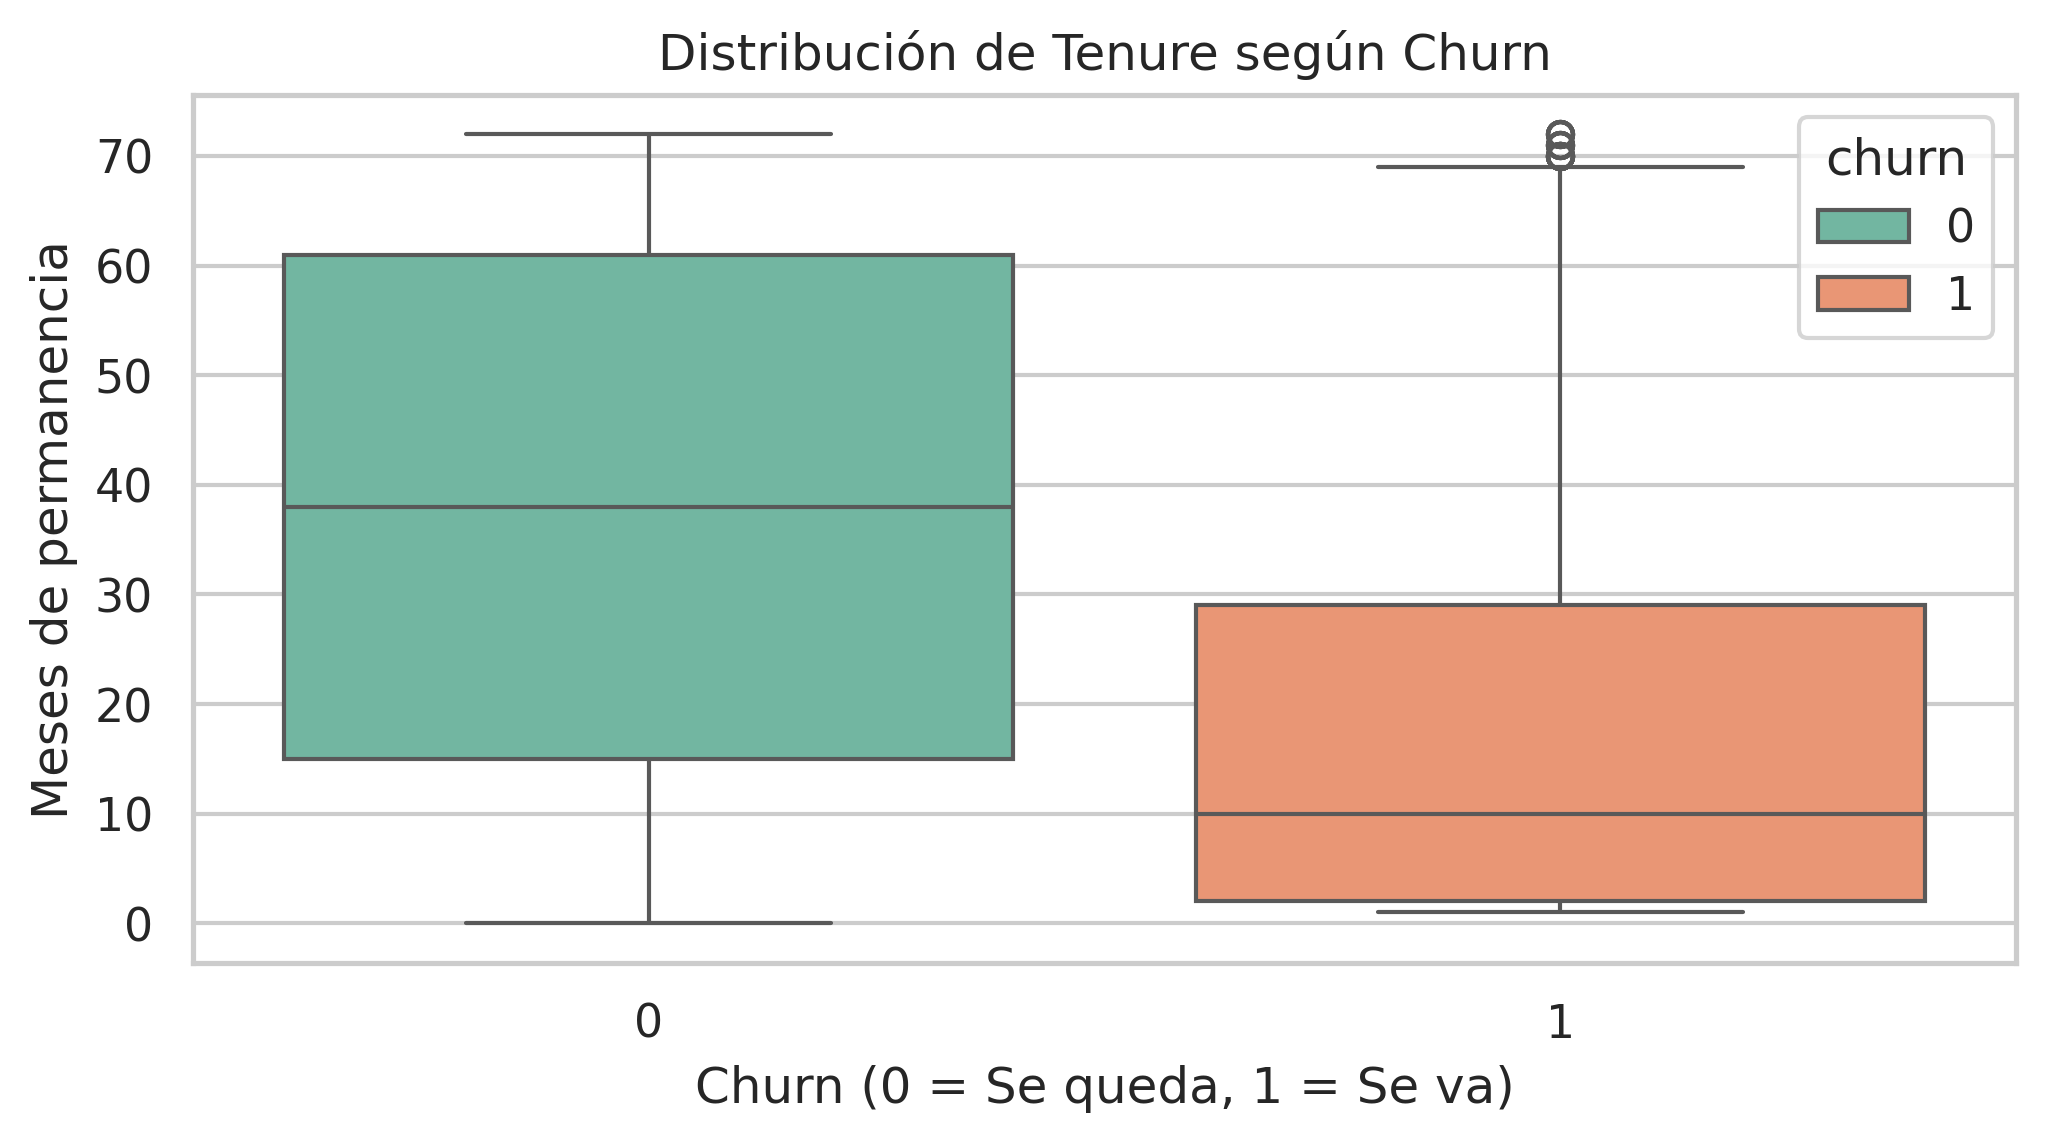


*   Se observó que ciertos métodos de pago, como electronic check, tienen una mayor proporción de evasión.


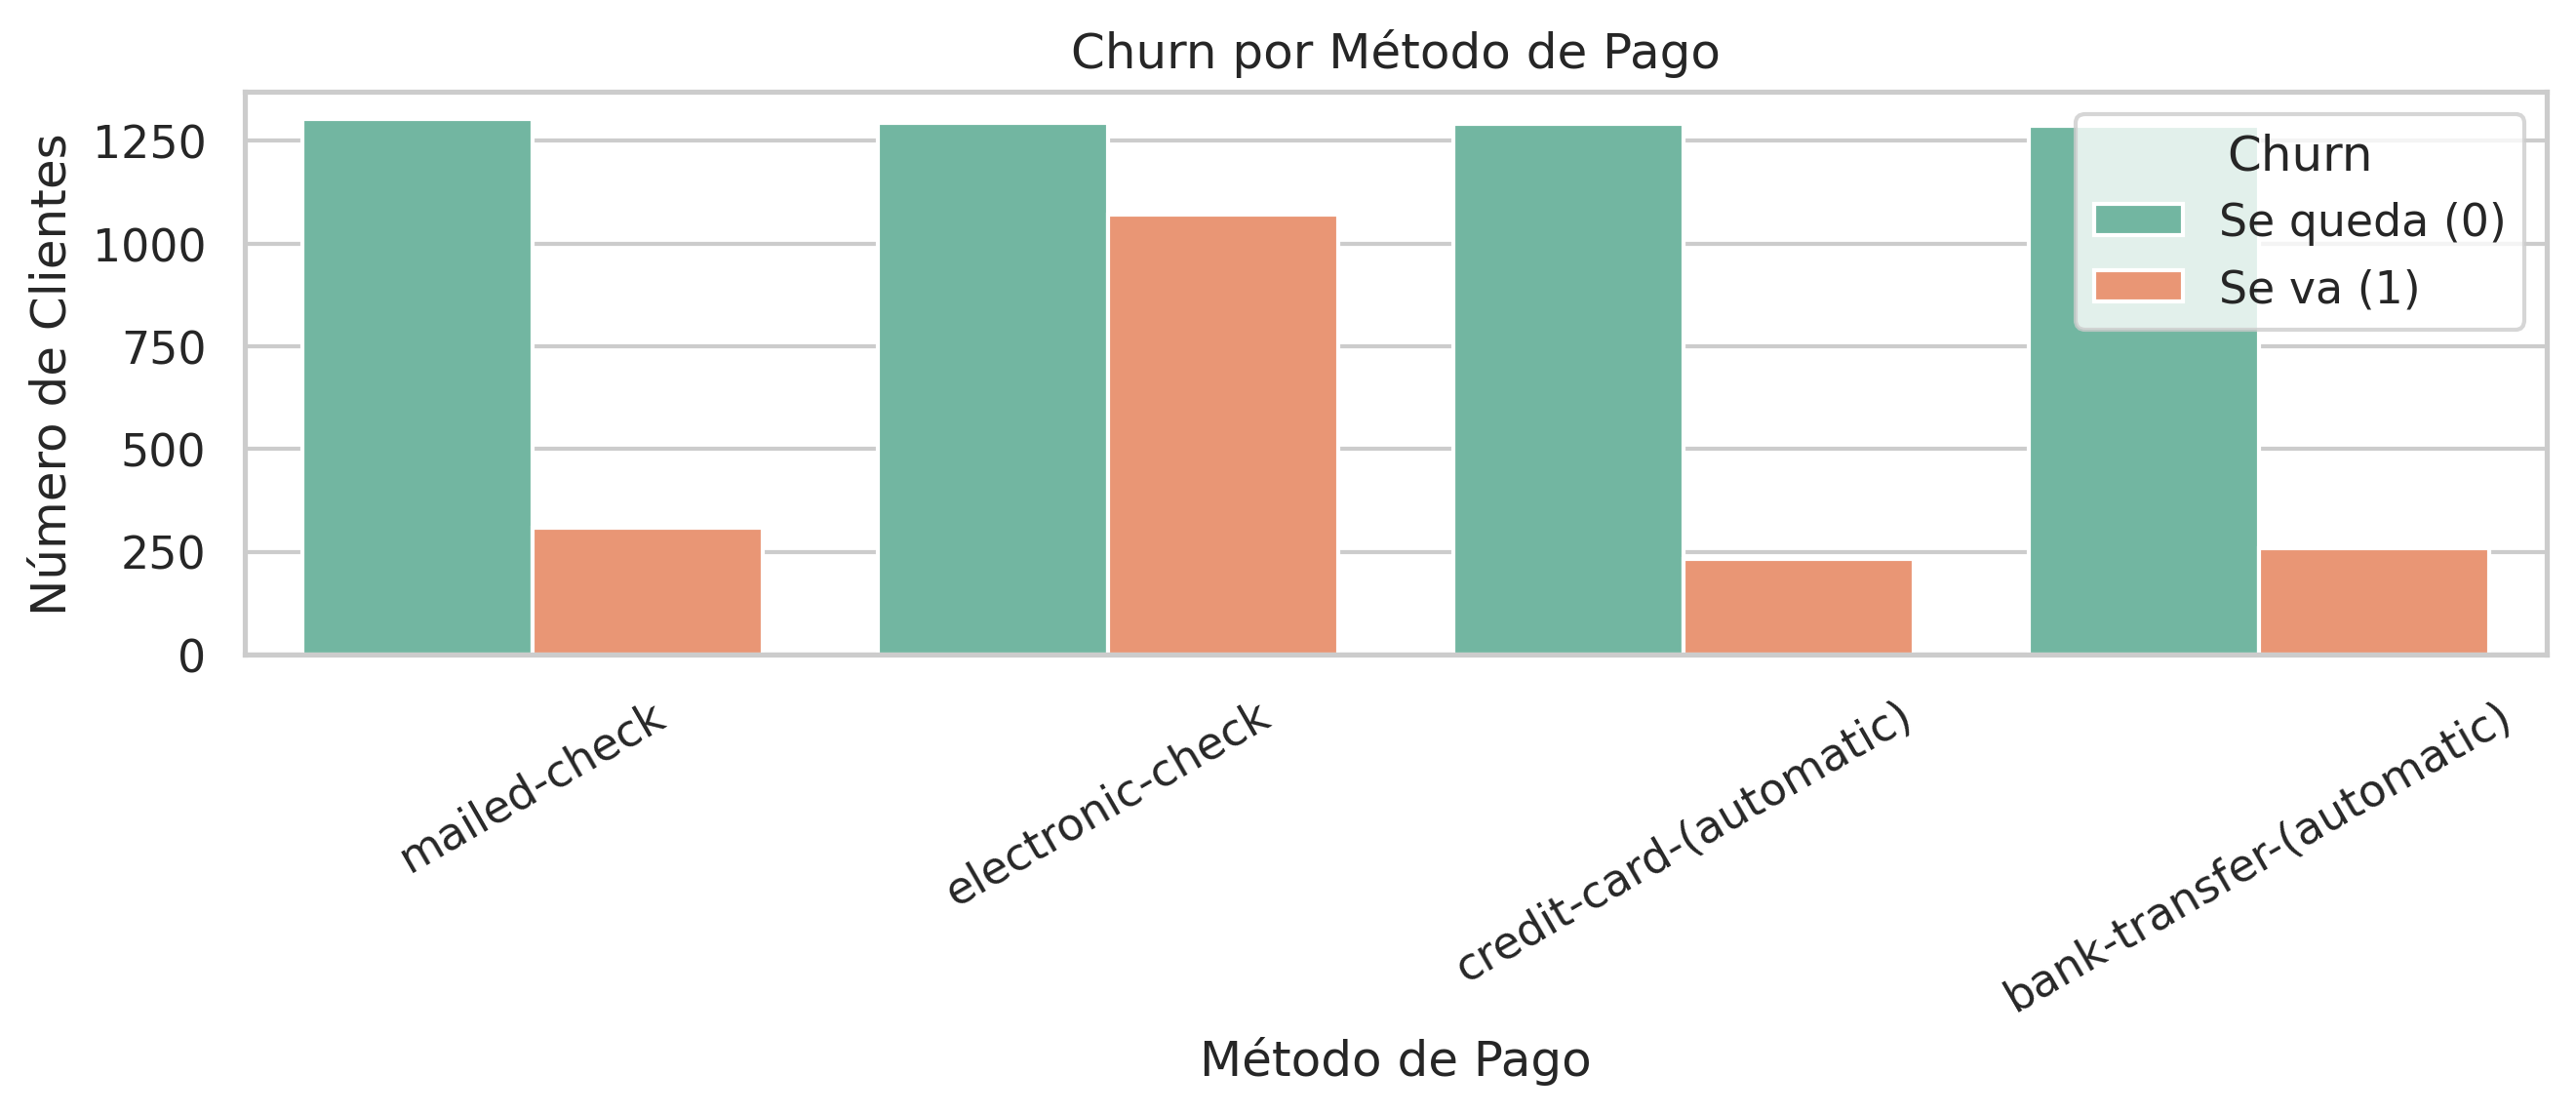

*   Los clientes con cargos mensuales altos y poca permanencia mostraron mayor tendencia a cancelar.

In [179]:
df_transformed.groupby('churn')[['tenure', 'charges.monthly', 'charges.total']].mean()


,tenure,charges.monthly,charges.total
churn,,,
0,37.569965,61.265124,2555.344141
1,17.979133,74.441332,1531.796094


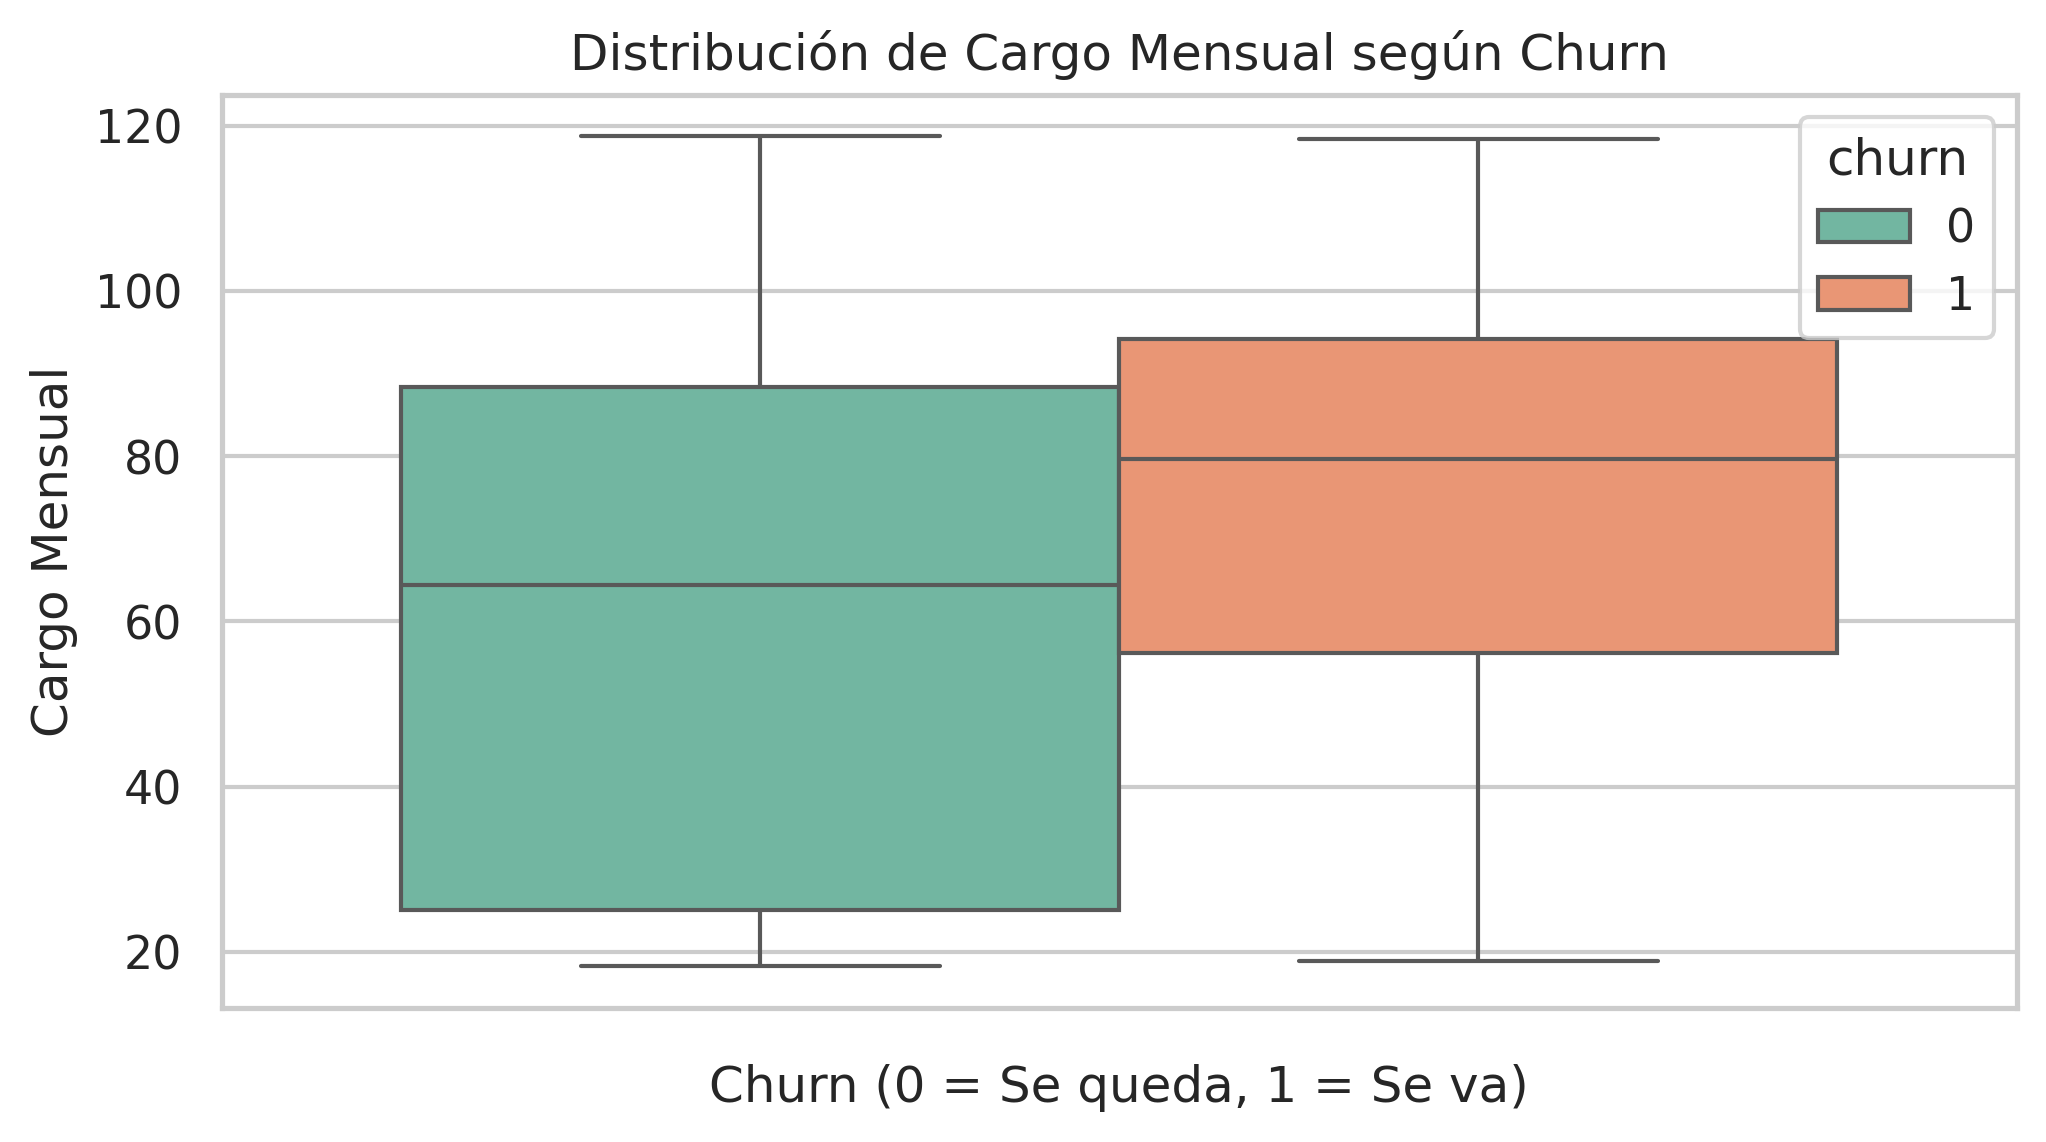

## Conclusiones e Insights



*   Los clientes con menos de 1 año de antigüedad y cargos altos son los que más se van.
*Los planes sin contrato (mes a mes) tienen tasas de evasión mucho más altas.
*Algunos métodos de pago pueden influir en la permanencia del cliente.
*Clientes que gastan menos por mes y han estado más tiempo tienden a quedarse.




## Recomendaciones


*   Ofrecer beneficios especiales a los clientes nuevos, especialmente en los primeros 6 meses.
*   Promover los contratos anuales o de 2 años con descuentos o regalos.
*   Revisar los planes con cargos mensuales más altos, ya que están más asociados a la evasión.
*Identificar y contactar clientes en riesgo (ej. llevan poco tiempo y pagan
mucho), con ofertas personalizadas o mejoras en el servicio.

